In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/sumeyahussein/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [3]:
#everyone run this block
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTest.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())


Path to dataset files: /Users/sumeyahussein/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1
Files in dataset directory: ['fraudTrain.csv', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                      

In [6]:
#Spandana runs this
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"C:\Users\Thinking1\vsc_workspace\FDS"

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTest.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())


Files in dataset directory: ['.git', 'fraudTest.csv', 'fraudTrain.csv', 'IEEE-CIS-Fraud-Detection', 'numpy_demo.ipynb', 'test.txt']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   E

In [ ]:
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/nirjalagurung/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTest.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

In [4]:
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=df.columns)

missing_df_filtered = missing_df[missing_df['Missing Data'] > 0]

if not missing_df_filtered.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'], palette="viridis")

    for i, (value, pct) in enumerate(zip(missing_df_filtered['Missing Data'], missing_df_filtered['Missing Percentage'])):
        ax.text(i, pct, f'{int(value)}', ha='center', va='bottom')

    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Data Analysis')
    ax.set_xlabel('Features with Missing Values')
    ax.tick_params(axis='x', rotation=90)
    ax.set_yscale('log')  

    plt.show()
else:
    print("No missing data found in the dataset.")

No missing data found in the dataset.


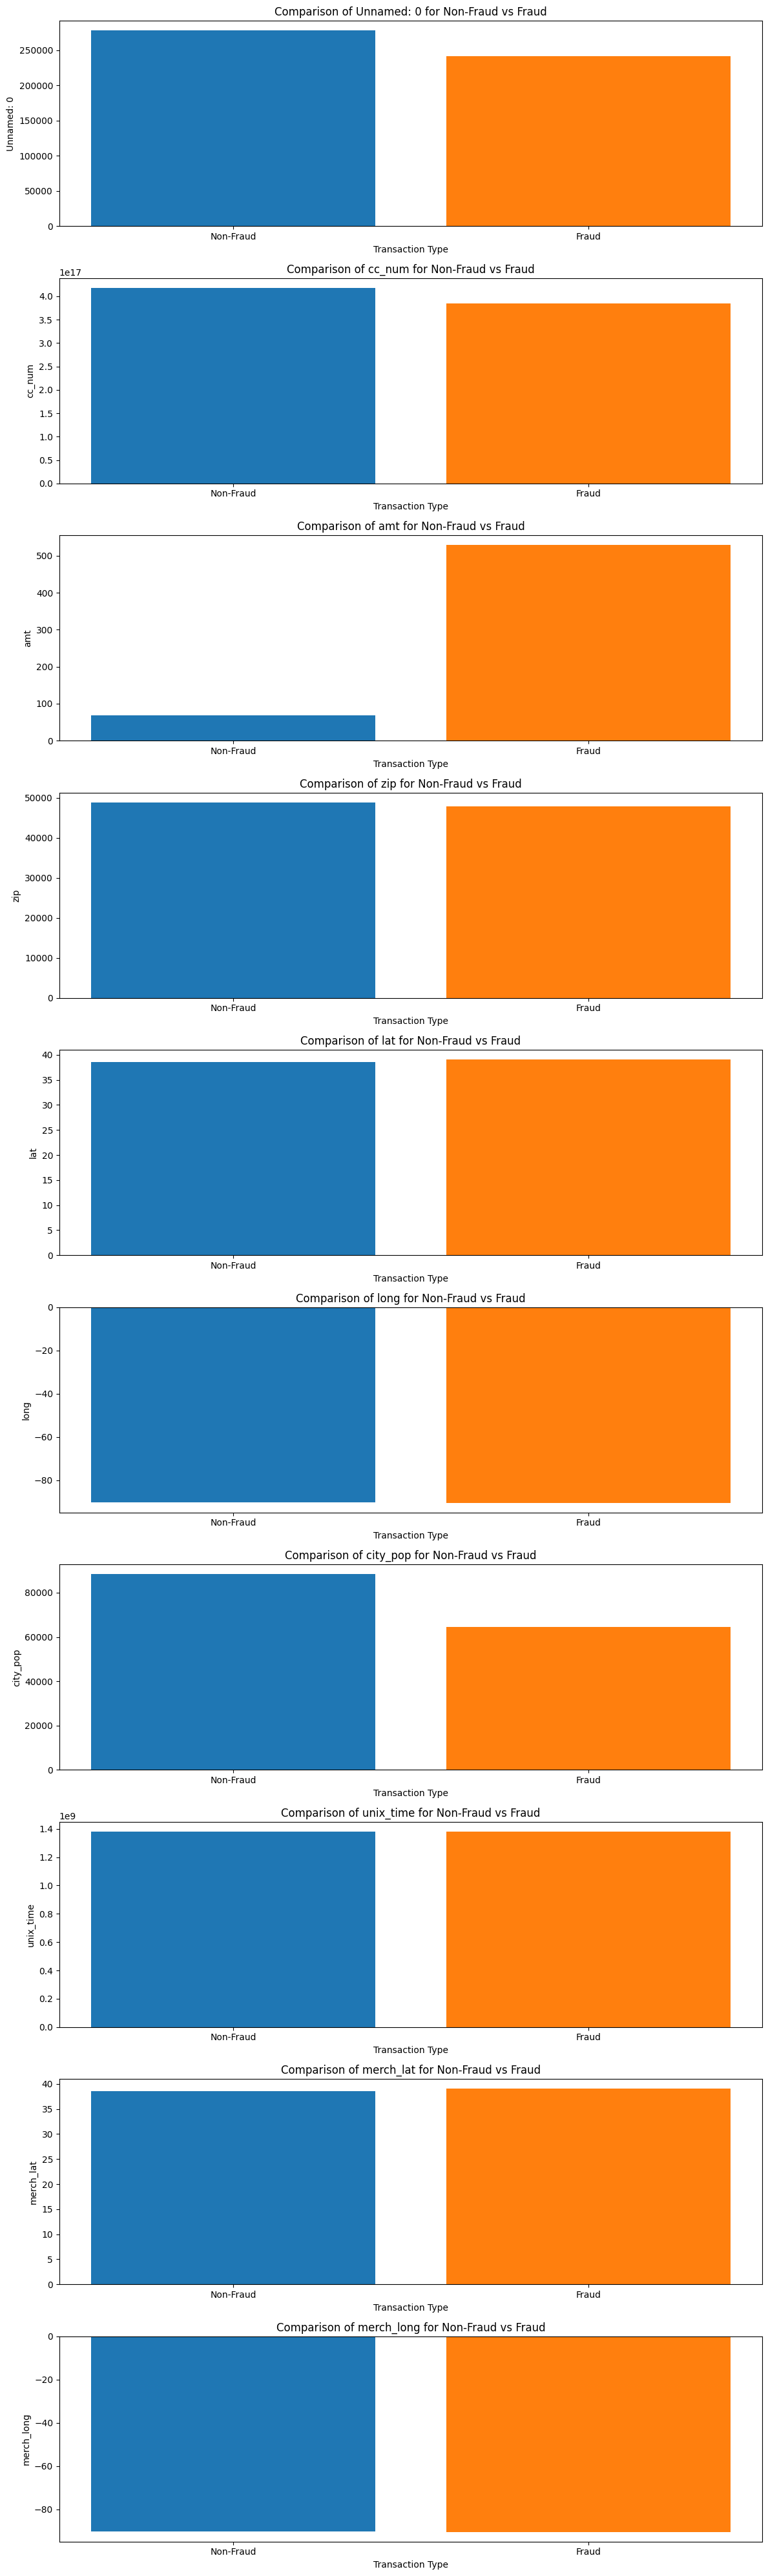

        Unnamed: 0 trans_date_trans_time            cc_num  \
1685          1685   2020-06-21 22:06:39  3560725013359375   
1767          1767   2020-06-21 22:32:22  6564459919350820   
1781          1781   2020-06-21 22:37:27  6564459919350820   
1784          1784   2020-06-21 22:38:55  4005676619255478   
1857          1857   2020-06-21 23:02:16  3560725013359375   
...            ...                   ...               ...   
517197      517197   2020-12-22 22:05:48  2242176657877538   
517274      517274   2020-12-22 22:18:07  2242176657877538   
517341      517341   2020-12-22 22:31:48  2242176657877538   
517529      517529   2020-12-22 23:06:03  2242176657877538   
517571      517571   2020-12-22 23:13:39  2242176657877538   

                                   merchant        category      amt    first  \
1685                   fraud_Hamill-D'Amore  health_fitness    24.84   Brooke   
1767      fraud_Rodriguez, Yost and Jenkins        misc_net   780.52  Douglas   
1781        

In [6]:
#checking is_fraud value 0 data values vs is_fraud value 1
import pandas as pd
import matplotlib.pyplot as plt

# Separate the data by is_fraud values
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Calculate means for numerical features by fraud type
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('is_fraud')
fraud_means = fraud_df[numerical_columns].mean()
non_fraud_means = non_fraud_df[numerical_columns].mean()

# Plotting the comparisons
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    ax[i].bar(['Non-Fraud', 'Fraud'], [non_fraud_means[col], fraud_means[col]], color=['#1f77b4', '#ff7f0e'])
    ax[i].set_title(f'Comparison of {col} for Non-Fraud vs Fraud')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Transaction Type')
    
plt.tight_layout()
plt.show()

# Filter rows with is_fraud equal to 1
fraudulent_transactions = df[df['is_fraud'] == 1]

# Display the rows with is_fraud == 1
print(fraudulent_transactions)


In [ ]:
# Check if 'is_fraud' column contains only 0 and 1
unique_values = df['is_fraud'].unique()

if set(unique_values) == {0, 1}:
    print("The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.")
else:
    print("Anomalies found in 'is_fraud' column:")
    print(f"Unexpected values: {unique_values}")


Unnamed: 0: 0 outliers found.
cc_num: 12819 outliers found.
amt: 18407 outliers found.
zip: 0 outliers found.
lat: 0 outliers found.
long: 0 outliers found.
city_pop: 77774 outliers found.
unix_time: 0 outliers found.
merch_lat: 0 outliers found.
merch_long: 0 outliers found.
Outliers in column cc_num replaced with median value: 3521417320836166.0
Outliers in column amt replaced with median value: 47.29
Outliers in column city_pop replaced with median value: 2408.0
40147 rows identified as outliers using Z-score method.
Rows with Z-score outliers have been dropped.


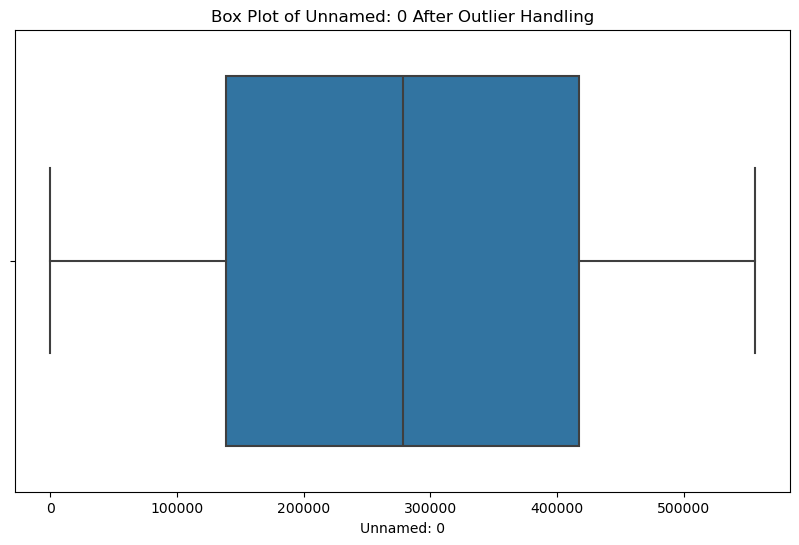

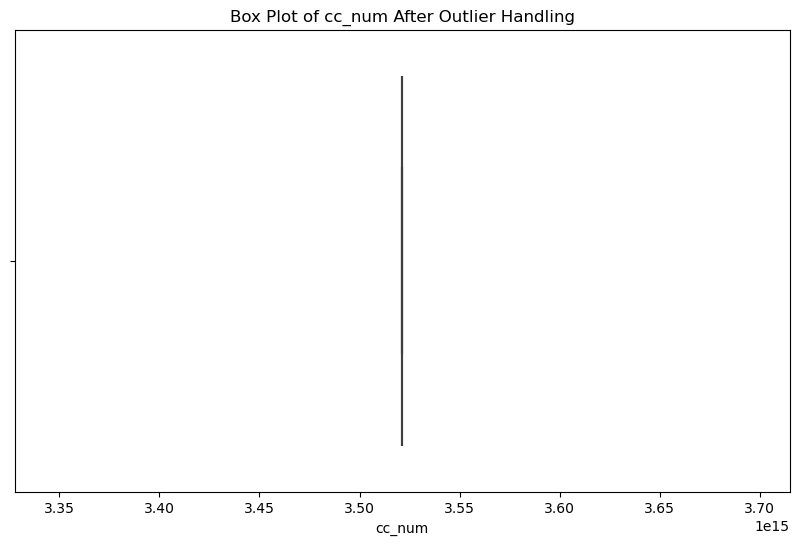

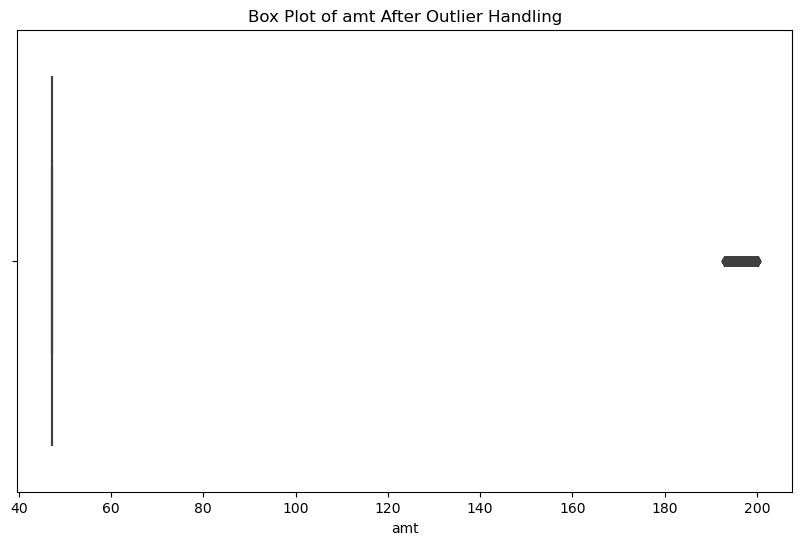

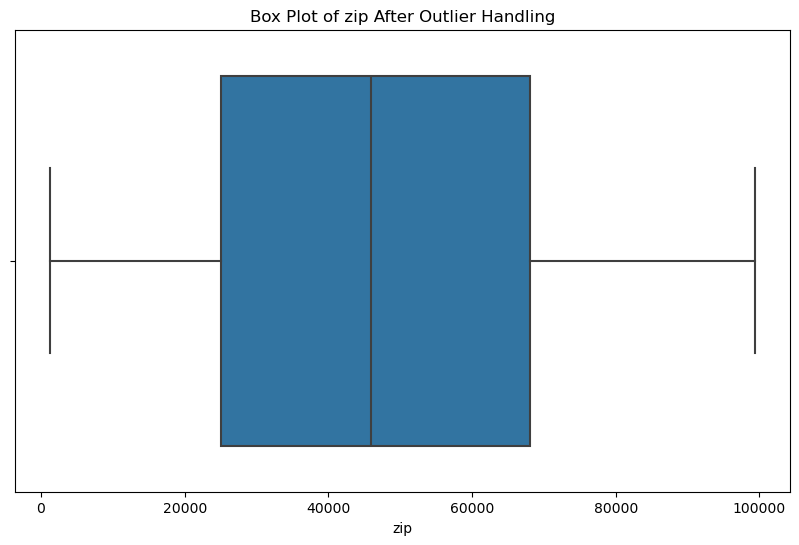

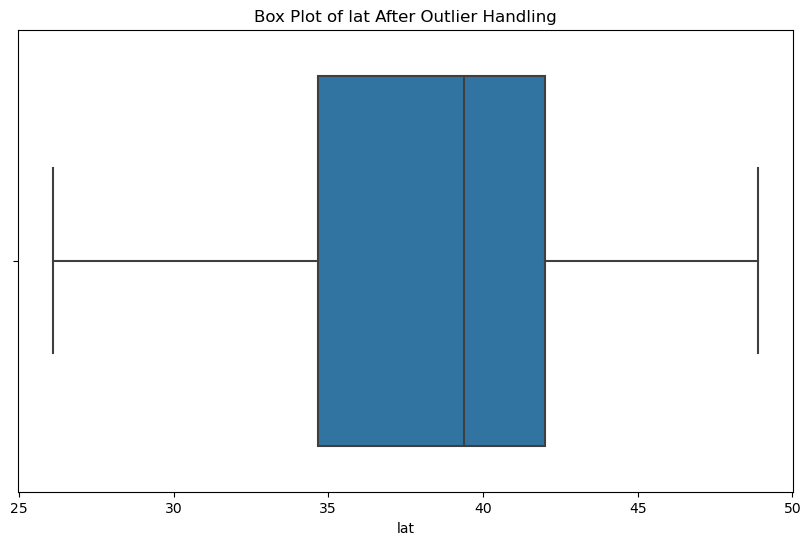

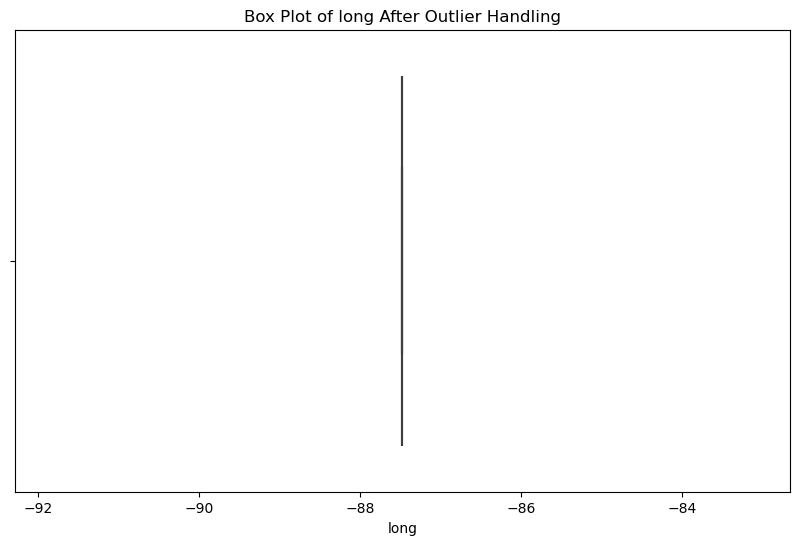

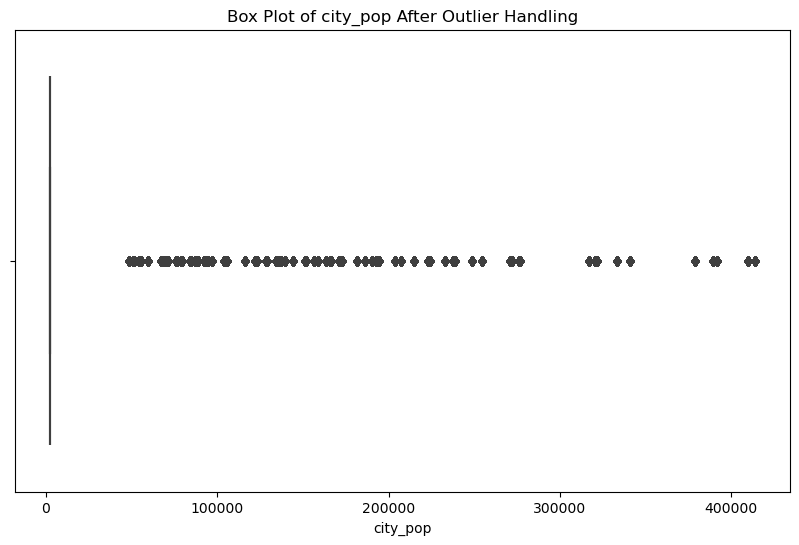

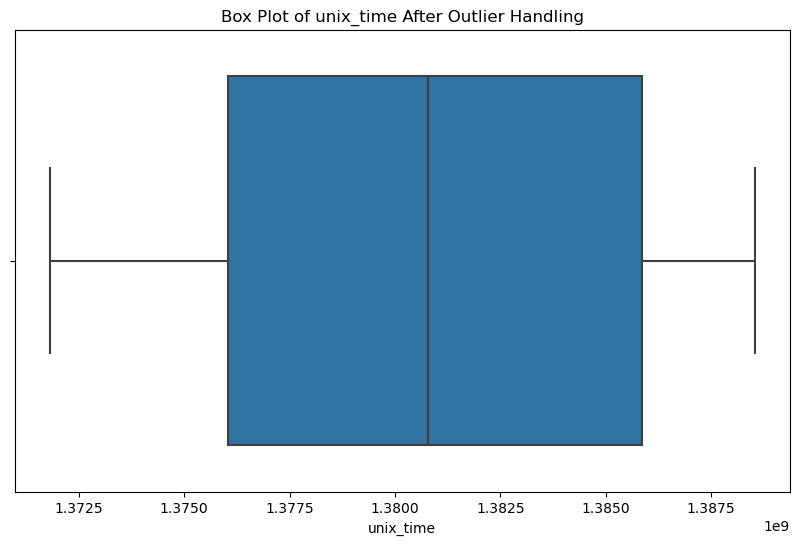

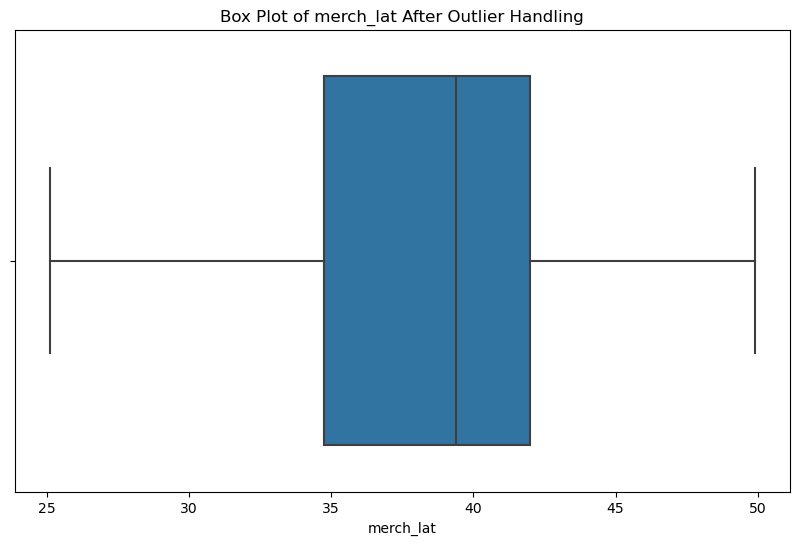

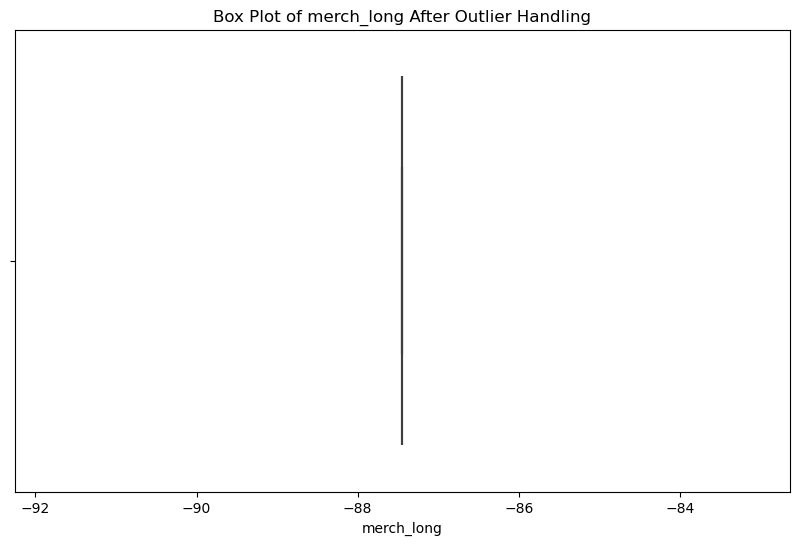

Unique values in trans_date_trans_time:
trans_date_trans_time
2020-10-05 19:37:49    4
2020-12-19 16:02:22    4
2020-12-14 11:22:19    3
2020-07-12 23:36:02    3
2020-12-15 19:28:13    3
                      ..
2020-08-25 12:47:06    1
2020-08-25 12:46:22    1
2020-08-25 12:45:21    1
2020-08-25 12:45:13    1
2020-12-31 23:59:34    1
Name: count, Length: 433908, dtype: int64

Unique values in merchant:
merchant
fraud_Kilback LLC                        1483
fraud_Cormier LLC                        1251
fraud_Schumm PLC                         1216
fraud_Dickinson Ltd                      1193
fraud_Kuhn LLC                           1168
                                         ... 
fraud_Satterfield-Lowe                    222
fraud_Kessler Inc                         220
fraud_Treutel-King                        218
fraud_Douglas, DuBuque and McKenzie       214
fraud_Ritchie, Bradtke and Stiedemann     214
Name: count, Length: 693, dtype: int64

Unique values in category:
category
ga

In [16]:
#checking for outliers 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers = find_outliers_iqr(df, col)
        outliers_dict[col] = outliers
        print(f"{col}: {len(outliers)} outliers found.")

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        # Strategy: Replace outliers with the median
        median_value = df[col].median()
        df.loc[(df[col] < outliers[col].min()) | (df[col] > outliers[col].max()), col] = median_value
        print(f"Outliers in column {col} replaced with median value: {median_value}")

#finding outliers with z score
z_scores = df[numerical_columns].apply(zscore)
outliers_z = (z_scores.abs() > 3).any(axis=1)
outlier_rows = df[outliers_z]

if outlier_rows.empty:
    print("No outliers found using Z-score method.")
else:
    print(f"{len(outlier_rows)} rows identified as outliers using Z-score method.")
    # Strategy: Drop rows with Z-score outliers
    df = df[~outliers_z]
    print("Rows with Z-score outliers have been dropped.")

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f"Box Plot of {col} After Outlier Handling")
        plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n{df[col].value_counts()}\n")



/var/folders/rk/02lv3n194nx0yl4xns9sbnw40000gn/T/ipykernel_70061/3008087521.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outliers_df, x='Column', y='Outlier Count', palette='viridis')


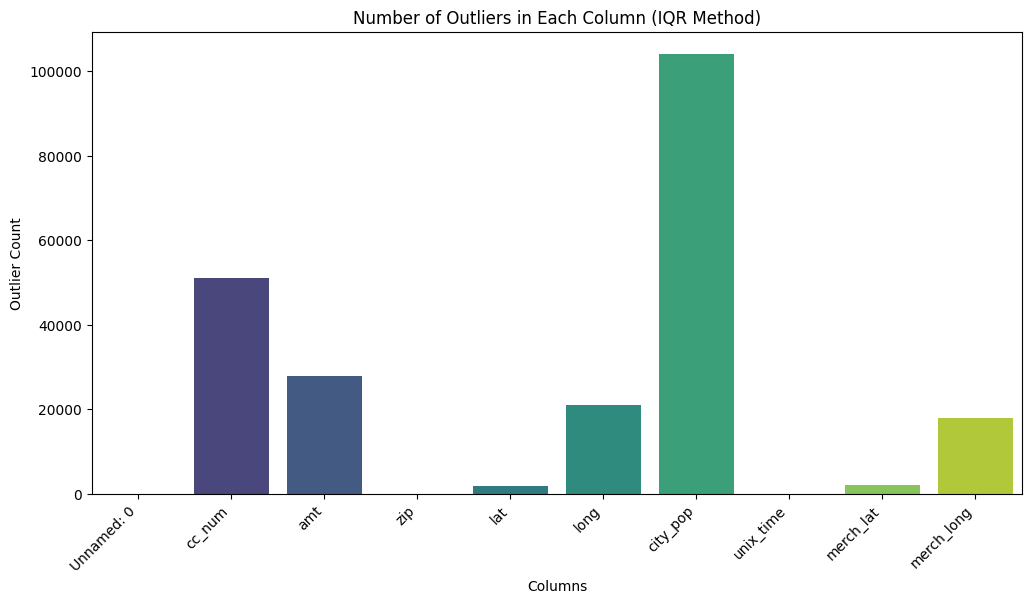

In [7]:
# outliers but a different visulization 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier counts
outliers_count = {}

# Calculate outlier counts using IQR
for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers_count[col] = find_outliers_iqr(df, col)

# Convert to DataFrame for easy visualization
outliers_df = pd.DataFrame(outliers_count.items(), columns=['Column', 'Outlier Count'])

# Plot a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=outliers_df, x='Column', y='Outlier Count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Outliers in Each Column (IQR Method)")
plt.xlabel("Columns")
plt.ylabel("Outlier Count")
plt.show()


In [ ]:
#feature selection 

In [15]:
#chaning float into string for easier feasture selection

# Print current data types
data_types = df.dtypes
#print("\nData Types:\n", data_types)

# Convert all float columns to strings
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

# Verify the conversion
print("\nUpdated Data Types:\n", df.dtypes)




Updated Data Types:
 Unnamed: 0                int64
trans_date_trans_time     int64
cc_num                    int64
merchant                  int64
category                  int64
amt                      object
first                     int64
last                      int64
gender                    int64
street                    int64
city                      int64
state                     int64
zip                       int64
lat                      object
long                     object
city_pop                  int64
job                       int64
dob                       int64
trans_num                 int64
unix_time                 int64
merch_lat                object
merch_long               object
is_fraud                  int64
dtype: object


In [ ]:
#standard scaler 
'''
#standard scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'distance_from_home']] = scaler.fit_transform(
    df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'distance_from_home']]
)
'''